In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax2.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [3]:
x=xlist
y=exp_out_list
#print(y)

In [4]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 60, 2000, 7, 2)


In [5]:
#y1=y[0:1,29:30,:,:,0:1]
print(y.shape)

#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
#y1_np=torch.from_numpy(y1)
#y1=torch.transpose(y1_np,1,2)
#print(y1.shape)
y2=y[0:1,:,0:1000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
#print(y1.shape)

(2, 60, 2000, 7, 2)
torch.Size([1, 1000, 60, 7, 1])


In [6]:
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)

torch.Size([1000, 60, 7])


In [7]:
y_train=y3[:,3:4,:]
print(y_train.shape)

torch.Size([1000, 1, 7])


In [8]:
x_train=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 14)
[[0.9515082  0.02859658 0.36347437 ... 0.35507327 0.8292224  0.4047569 ]
 [0.25135255 0.7703726  0.775273   ... 0.14982301 0.15127295 0.7362834 ]
 [0.19514024 0.16856277 0.07611024 ... 0.7874241  0.22519547 0.09913057]
 ...
 [0.47233897 0.5813042  0.5970881  ... 0.4770273  0.8321323  0.0551641 ]
 [0.9792367  0.9304237  0.7407218  ... 0.07495439 0.42210817 0.49420857]
 [0.77542037 0.6565631  0.83288056 ... 0.03630865 0.04533863 0.08364367]]


In [23]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+torch.sigmoid(self.layer1(x))
        x = x+torch.sigmoid(self.layer2(x))
        x = x+torch.sigmoid(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [10]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x):
        
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+0.1*(self.layer1(x))
        x = x+0.1*(self.layer2(x))
        x = x+0.1*(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [24]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([14, 14])


In [25]:
x_data=torch.tensor(x_train)
input = x_data
out = net(input)
print(out)
print(out.shape)

tensor([[-0.1230, -0.5698,  0.8881,  ...,  1.3161,  0.4119, -0.0592],
        [ 0.1366, -0.6857,  1.2290,  ...,  1.1674,  0.6294, -0.2159],
        [-0.1667, -0.8602,  1.0133,  ...,  1.2595,  0.4784, -0.0600],
        ...,
        [ 0.0787, -0.7773,  1.1379,  ...,  1.2353,  0.5113, -0.1207],
        [ 0.2608, -0.3634,  0.7123,  ...,  1.1764,  0.5641,  0.1005],
        [ 0.1976, -0.6826,  1.1580,  ...,  1.1250,  0.4534, -0.0284]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 7])


In [26]:
net.zero_grad()
out.backward(torch.randn(1000,7))

In [27]:
target=y_train
target_new=target.view(1000,7)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 7])
tensor(0.9386, grad_fn=<MseLossBackward>)


In [28]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.9386, grad_fn=<MseLossBackward>)
tensor(0.6520, grad_fn=<MseLossBackward>)
tensor(0.5361, grad_fn=<MseLossBackward>)
tensor(0.5113, grad_fn=<MseLossBackward>)
tensor(0.5180, grad_fn=<MseLossBackward>)
tensor(0.5278, grad_fn=<MseLossBackward>)
tensor(0.5323, grad_fn=<MseLossBackward>)
tensor(0.5305, grad_fn=<MseLossBackward>)
tensor(0.5221, grad_fn=<MseLossBackward>)
tensor(0.5086, grad_fn=<MseLossBackward>)
tensor(0.4929, grad_fn=<MseLossBackward>)
tensor(0.4783, grad_fn=<MseLossBackward>)
tensor(0.4679, grad_fn=<MseLossBackward>)
tensor(0.4634, grad_fn=<MseLossBackward>)
tensor(0.4637, grad_fn=<MseLossBackward>)
tensor(0.4657, grad_fn=<MseLossBackward>)
tensor(0.4664, grad_fn=<MseLossBackward>)
tensor(0.4649, grad_fn=<MseLossBackward>)
tensor(0.4617, grad_fn=<MseLossBackward>)
tensor(0.4573, grad_fn=<MseLossBackward>)
tensor(0.4523, grad_fn=<MseLossBackward>)
tensor(0.4471, grad_fn=<MseLossBackward>)
tensor(0.4427, grad_fn=<MseLossBackward>)
tensor(0.4395, grad_fn=<MseLossBac

In [16]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [17]:
y4=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y4[:,3:4,:]
print(y_test.shape)

torch.Size([1000, 60, 7])
torch.Size([1000, 1, 7])


In [18]:
x_test=torch.tensor(x_test)
test_out=net(x_test)
#LOSS = criterion(test_out, y_test)
print(test_out)
print(y_test)

tensor([[ 0.0477,  0.1374,  0.0712,  ...,  0.0243,  0.0215, -0.1114],
        [ 0.1132,  0.1811,  0.1245,  ..., -0.0626, -0.1765,  0.0858],
        [-0.0972, -0.0340, -0.1349,  ..., -0.0393,  0.0800,  0.1759],
        ...,
        [-0.0045,  0.0083,  0.0113,  ...,  0.0426,  0.0155,  0.0810],
        [ 0.2532,  0.2075,  0.1511,  ..., -0.1971,  0.2149,  0.0993],
        [ 0.2002,  0.1807,  0.2542,  ..., -0.1152,  0.0704, -0.1076]],
       grad_fn=<AddmmBackward>)
tensor([[[ 0.3560,  1.0386,  0.3677,  ...,  0.3649,  0.0780, -0.4388]],

        [[ 0.7401,  1.3101,  0.7692,  ..., -0.0033, -0.6254,  0.4717]],

        [[-0.6563, -0.2278, -0.7874,  ..., -0.2346,  0.2684,  0.6359]],

        ...,

        [[ 0.0415,  0.1389,  0.0364,  ...,  0.4750,  0.1792,  0.6742]],

        [[ 1.3797,  1.2997,  0.6255,  ..., -0.9197,  1.1616,  0.5402]],

        [[ 0.5171,  0.5964,  0.8175,  ..., -1.0062, -0.2314, -1.2184]]])


In [21]:
test_loss=criterion(y_test,test_out)
print(test_loss)

tensor(0.4899, grad_fn=<MseLossBackward>)


Text(0, 0.5, 'y_pred')

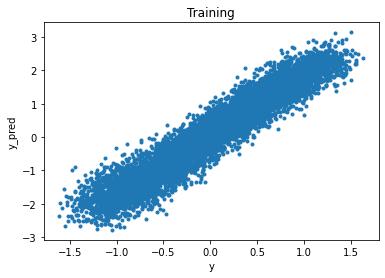

In [22]:
plt.plot(y_test.flatten(), 10*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

In [19]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

Net2(
  (layer1): Linear(in_features=14, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=120, bias=True)
  (layer3): Linear(in_features=120, out_features=120, bias=True)
  (layer4): Linear(in_features=120, out_features=84, bias=True)
  (layer5): Linear(in_features=84, out_features=42, bias=True)
  (layer6): Linear(in_features=42, out_features=7, bias=True)
)


params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [20]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

tensor([[0.0000, 0.1119, 0.1066,  ..., 0.1546, 0.0000, 0.0040],
        [0.0000, 0.1258, 0.0968,  ..., 0.1616, 0.0032, 0.0222],
        [0.0000, 0.1023, 0.0951,  ..., 0.1067, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0998, 0.0643,  ..., 0.1606, 0.0108, 0.0269],
        [0.0000, 0.1546, 0.1038,  ..., 0.1681, 0.0000, 0.0208],
        [0.0000, 0.1767, 0.1066,  ..., 0.1528, 0.0000, 0.0491]],
       grad_fn=<ReluBackward0>)
torch.Size([2000, 7])


C:\Users\zwdzw\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [21]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

RuntimeError: shape '[1000, 7]' is invalid for input of size 42000

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
